## Multi class classification of MNIST data using One-vs-One method

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn import svm
from sklearn.datasets import load_digits

In [2]:
CLASSES = 4
digits = load_digits(n_class = CLASSES)
X = digits.data
y = digits.target
print(X.shape, y.shape)

(720, 64) (720,)


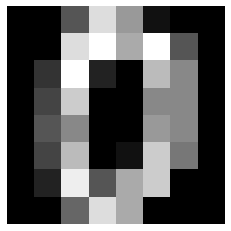

Label- 0


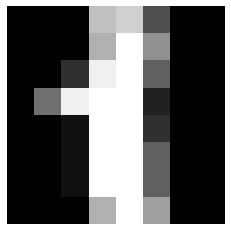

Label- 1


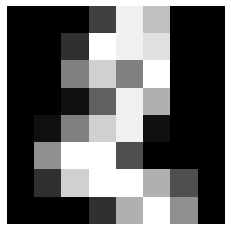

Label- 2


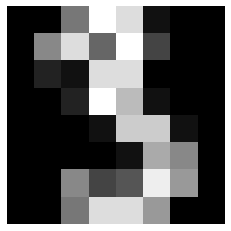

Label- 3


In [3]:
# Visualise the dataset

def drawImg(x, y=None):
    img = x.reshape((8, 8))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.show()
    if y is not None:
        print('Label-', y)
    return

for i in range(4):
    drawImg(X[i], y[i])

In [4]:
def classWiseData(X, y):
    data = {}
    for i in range(CLASSES):
        data[i] = []
    
    m = X.shape[0]
    for i in range(m):
        data[y[i]].append(X[i])
    for i in range(CLASSES):
        data[i] = np.array(data[i])
        
    return data

In [5]:
split_data = classWiseData(X, y)

print(len(split_data.keys()))
print(split_data[0].shape)
print(split_data[1].shape)
print(split_data[2].shape)
print(split_data[3].shape)

4
(178, 64)
(182, 64)
(177, 64)
(183, 64)


In [6]:
def getDataPairForSVM(d1, d2):
    m1, m2 = d1.shape[0], d2.shape[0]
    y1 = np.zeros((m1,), dtype='uint')
    y2 = np.ones((m2,), dtype='uint')
    
    X = np.vstack((d1, d2))
    y = np.hstack((y1, y2))
    
    return X, y

## Training NC2 SVM'S - one vs one classification

In [7]:
def trainSVMs(data):
    svm_clfs = {}
    
    for i in range(CLASSES):
        svm_clfs[i] = {}
        for j in range(i+1, CLASSES):
            Xpair, ypair = getDataPairForSVM(data[i], data[j])
            svm_clf = svm.SVC()
            svm_clfs[i][j] = svm_clf.fit(Xpair, ypair)
    
    return svm_clfs

In [8]:
svm_clfs = trainSVMs(split_data)

## Prediction

In [9]:
def predict(x):
    count = np.zeros((CLASSES,))
    x = x.reshape((1, -1))
    
    for i in range(CLASSES):
        for j in range(i+1, CLASSES):
            svm_clf = svm_clfs[i][j]
            
            # Take a majority prediction
            z = svm_clf.predict(x)
            
            if(z==1):
                count[j] += 1
            else:
                count[i] += 1
    
    final_pred = np.argmax(count)    
    return int(final_pred)

In [10]:
print(predict(X[0]))
print(y[0])

0
0


In [11]:
def accuracy(X, y):
    acc = 0
    m = X.shape[0]
    for i in range(m):
        if y[i] == predict(X[i]):
            acc += 1
    return acc/m

In [12]:
print(accuracy(X, y))

1.0
